In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


Dataset First Few Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal widt

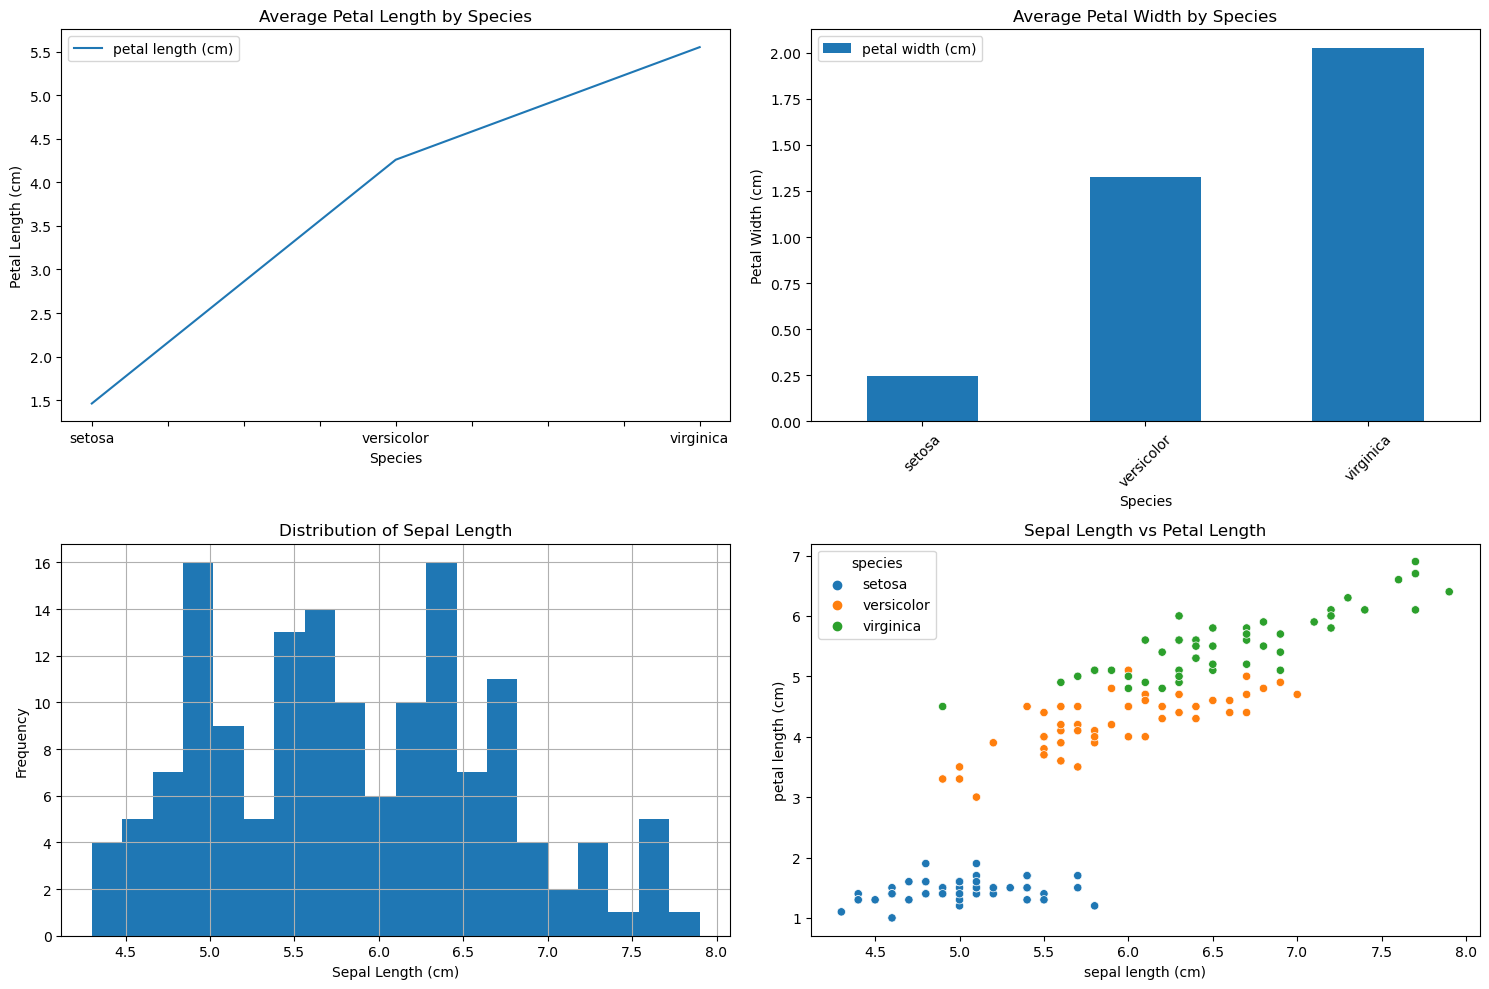

In [2]:
# Data Analysis and Visualization Assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Task 1: Load and Explore the Dataset
def load_and_explore_dataset():
    """
    Load the Iris dataset and perform initial exploration
    """
    try:
        # Load Iris dataset
        iris = load_iris()
        
        # Convert to pandas DataFrame
        df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                          columns=iris['feature_names'] + ['target'])
        
        # Add species names
        df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
        
        # Display first few rows
        print("Dataset First Few Rows:")
        print(df.head())
        
        # Check dataset info
        print("\nDataset Information:")
        print(df.info())
        
        # Check for missing values
        print("\nMissing Values:")
        print(df.isnull().sum())
        
        return df
    
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        return None

# Task 2: Basic Data Analysis
def perform_data_analysis(df):
    """
    Perform basic statistical analysis on the dataset
    """
    # Descriptive statistics of numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    # Grouping analysis
    print("\nMean of Numerical Features by Species:")
    grouped_analysis = df.groupby('species')[['sepal length (cm)', 'sepal width (cm)', 
                                               'petal length (cm)', 'petal width (cm)']].mean()
    print(grouped_analysis)
    
    return grouped_analysis

# Task 3: Data Visualization
def create_visualizations(df):
    """
    Create multiple types of visualizations
    """
    plt.figure(figsize=(15, 10))
    
    # 1. Line Chart (Simulated trend over index)
    plt.subplot(2, 2, 1)
    df.groupby('species')[['petal length (cm)']].mean().plot(kind='line', ax=plt.gca())
    plt.title('Average Petal Length by Species')
    plt.xlabel('Species')
    plt.ylabel('Petal Length (cm)')
    
    # 2. Bar Chart
    plt.subplot(2, 2, 2)
    df.groupby('species')[['petal width (cm)']].mean().plot(kind='bar', ax=plt.gca())
    plt.title('Average Petal Width by Species')
    plt.xlabel('Species')
    plt.ylabel('Petal Width (cm)')
    plt.xticks(rotation=45)
    
    # 3. Histogram
    plt.subplot(2, 2, 3)
    df['sepal length (cm)'].hist(bins=20)
    plt.title('Distribution of Sepal Length')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
    
    # 4. Scatter Plot
    plt.subplot(2, 2, 4)
    sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
    plt.title('Sepal Length vs Petal Length')
    
    plt.tight_layout()
    plt.show()

# Main Execution
def main():
    # Load Dataset
    iris_df = load_and_explore_dataset()
    
    if iris_df is not None:
        # Perform Data Analysis
        perform_data_analysis(iris_df)
        
        # Create Visualizations
        create_visualizations(iris_df)

if __name__ == "__main__":
    main()